In [1]:
#Eda feature engineering
import pandas as pd
import numpy as np

#visulazation packages
import matplotlib.pyplot as plt
import seaborn as sns

#text cleaning data
import neattext.functions as nfx

#load ml packages and estimators
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB

#transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [7]:
#pip install neattext

In [2]:
import os
os.chdir(r"C:\Users\Sandeep\OneDrive\Desktop\Coching\Resume Projects\CAPSTONE PROJECT_DEPLOYMENT\SENTIMENT ANALYSIS")

In [3]:
df=pd.read_csv(r"C:\Users\Sandeep\OneDrive\Desktop\Coching\Resume Projects\CAPSTONE PROJECT_DEPLOYMENT\SENTIMENT ANALYSIS\emotion_dataset_raw.csv")

In [4]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [5]:
df.shape

(34792, 2)

In [6]:
df.size

69584

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [8]:
df.isna().any()

Emotion    False
Text       False
dtype: bool

In [9]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

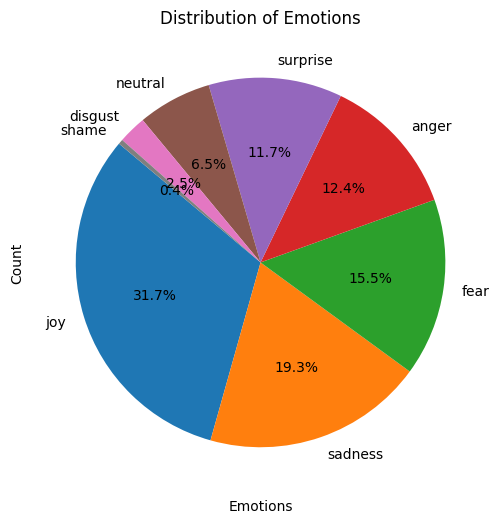

In [11]:
# Calculate value counts of emotions
emotion_counts = df['Emotion'].value_counts()

# Create a pie plot using Matplotlib
plt.figure(figsize=(6, 6))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

In [12]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [13]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [14]:
#user handles
df['clean_data']=df['Text'].apply(nfx.remove_userhandles)

In [15]:
df.head(10)

,Emotion,Text,clean_data
0,neutral,Why ?,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz for u .! babe naamazed ...
5,fear,I'm expecting an extremely important phonecall...,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...,.Couldnt wait to see them live. If missing th...
7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van . : welk...


In [16]:
#stop words
df['clean_data']=df['clean_data'].apply(nfx.remove_stopwords)
#stopwords the coffe words the and it has is why where6
df

,Emotion,Text,clean_data
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [17]:
#removing the special character
df['clean_data']=df['clean_data'].apply(nfx.remove_special_characters)
df

,Emotion,Text,clean_data
0,neutral,Why ?,
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,anger,A man robbed me today .,man robbed today
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


In [18]:
x=df.iloc[:,2]
y=df['Emotion']

In [19]:
x

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                             Youu JEALOUSY Losing YOU
34791                                think baby dream time
Name: clean_data, Length: 34792, dtype: object

In [20]:
y

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

#### MODEL BUIDLING

In [22]:
from sklearn.pipeline import Pipeline

#count vector is used to convert collection of text document in to vector of term and token count
#Logistic Regression calculate or predict the probability of binary yes or no event occuring

In [23]:
#logistic regression pip line
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [26]:
pipe_lr.fit(x_train,y_train)

C:\Users\Sandeep\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [25]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [27]:
pipe_lr.score(x_test,y_test)

0.6217666219582295

In [31]:
a='this book was so intersting'
pipe_lr.predict([a])

array(['joy'], dtype=object)

In [34]:
pipe_lr.predict_log_proba([a])

array([[-2.70289514, -3.00275695, -2.61840473, -0.70260285, -3.67858209,
        -1.28104602, -6.40933857, -4.55888436]])

In [33]:
pipe_lr.predict_proba([a])# probability for each class

array([[0.06701122, 0.04965   , 0.0729191 , 0.49529445, 0.02525876,
        0.27774662, 0.00164611, 0.01047374]])

In [30]:
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

#### Saving the Model

In [35]:
import joblib
pipeline_file=open('emotion_classifier.pkl','wb')
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()